# Calculating the Beta index with Linear Regression

* Beta is the measure of how much an stock will move in relation to another stock in this case in relation to the Benchmark. So if an stock has Beta = 1.2 for each 1% that the benchmarck moves this stock will move 1.2%.
* Its a measure to calculate the risk/reward of an investment.

In [2]:
%%capture
!pip install yfinance

In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [4]:
#Extrating the data
initial_date = "2018-01-01"
final_date = "2022-07-31"
benchmas = "^BVSP"
df = yf.download(['ELET3.SA','ITUB4.SA', '^BVSP'], start = initial_date, end = final_date)['Adj Close']
df

[*********************100%***********************]  3 of 3 completed


,ELET3.SA,ITUB4.SA,^BVSP
Date,,,
2018-01-02,14.956762,24.224379,77891.0
2018-01-03,14.765722,24.390001,77995.0
2018-01-04,14.670203,24.897888,78647.0
2018-01-05,14.534884,24.969660,79071.0
2018-01-08,14.630403,24.886845,79379.0
...,...,...,...
2022-07-25,44.849998,23.317312,100270.0
2022-07-26,44.650002,23.188868,99772.0
2022-07-27,45.369999,23.267910,101438.0


In [5]:
df.dropna(inplace=True)
df

,ELET3.SA,ITUB4.SA,^BVSP
Date,,,
2018-01-02,14.956762,24.224379,77891.0
2018-01-03,14.765722,24.390001,77995.0
2018-01-04,14.670203,24.897888,78647.0
2018-01-05,14.534884,24.969660,79071.0
2018-01-08,14.630403,24.886845,79379.0
...,...,...,...
2022-07-25,44.849998,23.317312,100270.0
2022-07-26,44.650002,23.188868,99772.0
2022-07-27,45.369999,23.267910,101438.0


In [6]:
#To calcule the Beta we use the percent variation
df['%ELET3'] = df['ELET3.SA'].pct_change()
df['%ITUB4'] = df['ITUB4.SA'].pct_change()
df['%IBOV'] = df['^BVSP'].pct_change()
#Dont considerate the row 1 because will be Nan
df = df [1:] 
df

,ELET3.SA,ITUB4.SA,^BVSP,%ELET3,%ITUB4,%IBOV
Date,,,,,,
2018-01-03,14.765722,24.390001,77995.0,-0.012773,0.006837,0.001335
2018-01-04,14.670203,24.897888,78647.0,-0.006469,0.020824,0.008360
2018-01-05,14.534884,24.969660,79071.0,-0.009224,0.002883,0.005391
2018-01-08,14.630403,24.886845,79379.0,0.006572,-0.003317,0.003895
2018-01-09,14.049325,24.616339,78864.0,-0.039717,-0.010869,-0.006488
...,...,...,...,...,...,...
2022-07-25,44.849998,23.317312,100270.0,0.004929,0.014617,0.013596
2022-07-26,44.650002,23.188868,99772.0,-0.004459,-0.005509,-0.004967
2022-07-27,45.369999,23.267910,101438.0,0.016125,0.003409,0.016698


In [7]:
df.isna().sum()

ELET3.SA    0
ITUB4.SA    0
^BVSP       0
%ELET3      0
%ITUB4      0
%IBOV       0
dtype: int64

In [8]:
#X will receive the Benchmark
X = df["%IBOV"]

In [9]:
X

Date
2018-01-03    0.001335
2018-01-04    0.008360
2018-01-05    0.005391
2018-01-08    0.003895
2018-01-09   -0.006488
                ...   
2022-07-25    0.013596
2022-07-26   -0.004967
2022-07-27    0.016698
2022-07-28    0.011426
2022-07-29    0.005536
Name: %IBOV, Length: 1132, dtype: float64

In [10]:
#reshape(row, columns) now we will have a matrix that will fit in the sklearn
X = df['%IBOV'].values.reshape(-1, 1)
X

array([[0.0013352 ],
       [0.00835951],
       [0.00539118],
       ...,
       [0.01669807],
       [0.0114257 ],
       [0.00553622]])

In [11]:
#Same processor for the Stock
Y_elet = df['%ELET3'].values.reshape(-1, 1)
Y_elet

array([[-0.01277282],
       [-0.00646897],
       [-0.00922405],
       ...,
       [ 0.01612536],
       [ 0.00176332],
       [ 0.00792081]])

In [12]:
Y_itub = df['%ITUB4'].values.reshape(-1,1)
Y_itub

array([[ 0.00683703],
       [ 0.02082357],
       [ 0.00288264],
       ...,
       [ 0.00340864],
       [ 0.00636949],
       [-0.00337556]])

In [13]:
# Find best line
linear_regressor_elet = LinearRegression()

In [14]:
reg_elet = linear_regressor_elet.fit(X, Y_elet)
# Predict Y values from line found
Y_pred_elet = linear_regressor_elet.predict(X)

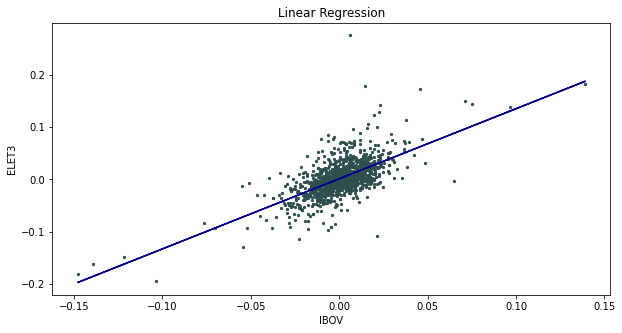

In [15]:
# Plot scatter along with regression
plt.figure(figsize=(10,5))
plt.scatter(X, Y_elet, s=5, color = 'DarkSlateGrey')
plt.plot( X, Y_pred_elet, color='DarkBlue')
plt.title("Linear Regression")
plt.xlabel("IBOV")
plt.ylabel("ELET3")
plt.show()

In [16]:
linear_regressor_itub = LinearRegression()
reg_itub = linear_regressor_itub.fit(X, Y_itub)
Y_pred_itub = linear_regressor_itub.predict(X)

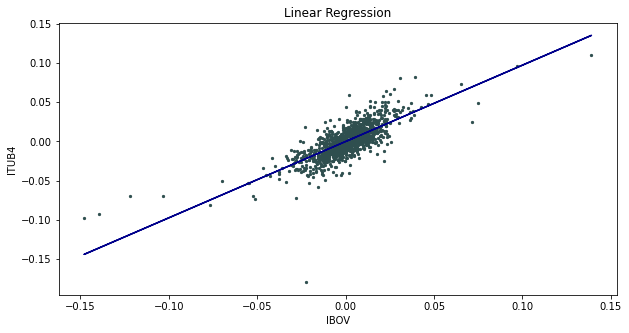

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(X, Y_itub, s=5, color = 'DarkSlateGrey')
plt.plot( X, Y_pred_itub, color='DarkBlue')
plt.title("Linear Regression")
plt.xlabel("IBOV")
plt.ylabel("ITUB4")
plt.show()

In [18]:
beta_elet = reg_elet.coef_[0][0]
print(f'Beta ELET3:{beta_elet}')

Beta ELET3:1.3446676717767083


In [19]:
beta_itub = reg_itub.coef_[0][0]
print(f'Beta ITUB4:{beta_itub}')

Beta ITUB4:0.9722183526768282


In [20]:
dfbeta = pd.Series({'Beta ELET3': [beta_elet], 'Beta ITUB4': [beta_itub]})
dfbeta

Beta ELET3    [1.3446676717767083]
Beta ITUB4    [0.9722183526768282]
dtype: object

####In conclusion:
* We can see that for the last 4 years when the Benchmark moved 1% up or down, ELET3 stock was moving 1.3% meaning that it can be a more risky investment than the benchmark but also can bring more returns.
* In in comparison the ITUB4 stock was moving a a little less than the benchmark.
* Now that we have this information about the beta index let's calculate de Value at Risk for a portfolio that would have only this 2 stocks.

#VaR (Value at Risk)

* VaR will measure the worst expected loss over a given time horizon under a normal market condition with a given level of confidence.
* The VaR will not calculate the worst expected loss for a not normal 
condition. For that a strees test can do better at calculating the expected loss under a economic crisis or market crash,events out of curve popularly called Black Swans.

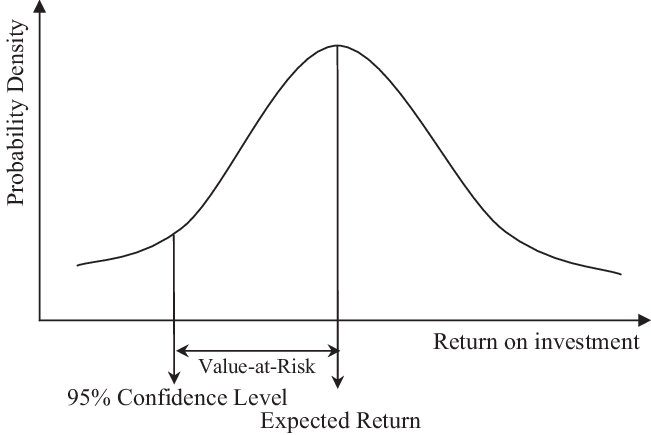

We will calculate the Var for the same stocks we calculate the Beta

In [21]:
#Imports
import matplotlib.mlab as mlab
from scipy.stats import norm
from tabulate import tabulate

In [22]:
#Visualizing the data
df.head()

,ELET3.SA,ITUB4.SA,^BVSP,%ELET3,%ITUB4,%IBOV
Date,,,,,,
2018-01-03,14.765722,24.390001,77995.0,-0.012773,0.006837,0.001335
2018-01-04,14.670203,24.897888,78647.0,-0.006469,0.020824,0.008360
2018-01-05,14.534884,24.969660,79071.0,-0.009224,0.002883,0.005391
2018-01-08,14.630403,24.886845,79379.0,0.006572,-0.003317,0.003895
2018-01-09,14.049325,24.616339,78864.0,-0.039717,-0.010869,-0.006488


In [23]:
#Copying only the data we will use to other dataframe
df1 = df[:]
df1 = df1.loc[:,['ELET3.SA','ITUB4.SA']]

Usually as in the previous analysis of the beta we use the pct_change function to calculate the returns but for this analysis we will use the the log variation.

In [24]:
returns = np.log(df1 / df1.shift(1)).dropna()
returns

,ELET3.SA,ITUB4.SA
Date,,
2018-01-04,-0.006490,0.020610
2018-01-05,-0.009267,0.002878
2018-01-08,0.006550,-0.003322
2018-01-09,-0.040527,-0.010929
2018-01-10,-0.041058,-0.003369
...,...,...
2022-07-25,0.004917,0.014512
2022-07-26,-0.004469,-0.005524
2022-07-27,0.015997,0.003403


For this portfolio we will assume that we have 60% allocated in ELET3 and 40% in ITUB4, a little agressive since the beta we calculate for ELET3 is 1.34 and for ITUB is 0.97

In [25]:
#The weights for each stock
weights = np.array([.6, .4])
weights

array([0.6, 0.4])

In [26]:
#To calculate the weighted return of our portfolio we use the dot function
returns['Portfolio'] = returns.dot(weights)
returns

,ELET3.SA,ITUB4.SA,Portfolio
Date,,,
2018-01-04,-0.006490,0.020610,0.004350
2018-01-05,-0.009267,0.002878,-0.004409
2018-01-08,0.006550,-0.003322,0.002601
2018-01-09,-0.040527,-0.010929,-0.028688
2018-01-10,-0.041058,-0.003369,-0.025983
...,...,...,...
2022-07-25,0.004917,0.014512,0.008755
2022-07-26,-0.004469,-0.005524,-0.004891
2022-07-27,0.015997,0.003403,0.010959


In [27]:
#Now we need to calculate the mean and standard deviation of the returns of our portfolio
returns_mean = np.mean(returns['Portfolio'])
returns_std = np.std(returns['Portfolio'])
print(f'Portfolio daily returns mean = {returns_mean:.2%}')
print(f'Portfolio daily returns std = {returns_std:.2%}')

Portfolio daily returns mean = 0.06%
Portfolio daily returns std = 2.69%


In [28]:
#Getting the ppf(percent point function) z*score with 95% of critic value, mean 0 and standard deviation 1
norm.ppf(0.95, 0, 1)

1.6448536269514722

In [29]:
#With an 95% confidence level we have
# if 0.05, we are using: 1 - alpha = 0.95 or 95% confidence level
alpha = 0.05 

var =  norm.ppf(alpha, returns_mean, returns_std)
print(f'The daily VaR value is {var:.2%} for our potfolio.')


The daily VaR value is -4.36% for our potfolio.


Thus if we have an invested capital of x in this portfolio we have:

In [30]:
capital = 10000
max_losses = var*capital 

print(f'We have {1-alpha:.0%} confidence that out selected portfolio of R${capital:.0f} invested will not exceed losses greater than R${max_losses:.2f} daily.')

We have 95% confidence that out selected portfolio of R$10000 invested will not exceed losses greater than R$-436.46 daily.


#Comparing the portfolio return with a normal distribution

###Visualization

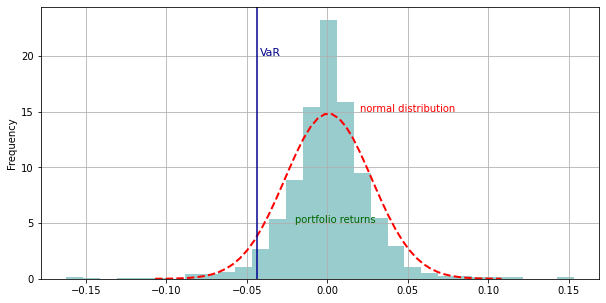

In [31]:
# plot the histogram of the portfolio returns
plt.figure(figsize=(10,5))
returns['Portfolio'].hist(bins=30, density=True, histtype='stepfilled', alpha=0.4, color='teal')

# plot a theoretical normal distribution based on portfolio returns statistics
x = np.linspace((returns_mean - 4*returns_std), (returns_mean + 4*returns_std), 50)
plt.plot(x, norm.pdf(x, returns_mean, returns_std), 'r--', lw=2)

# add VaR value as a vertical line
plt.axvline(x=var, color = 'Darkblue')

# add text to plot
plt.text(0.02, 15, 'normal distribution', fontsize=10, color='red')
plt.text(-0.02, 5, 'portfolio returns', fontsize=10, color='darkgreen')
plt.text(-0.042, 20, 'VaR', fontsize=11, color='Darkblue')

# add label
plt.ylabel('Frequency')

plt.show()

* As we can see our potfolio returns has a similar behavior with a normal function.
* But is not perfect, as we can see sometimes the loss was greater than expected this happens because of the fat tail effect. An unexpected market behavior as in the 2020 COVID crash for example.